Name : Keval Shah  
SAP ID: 60009220061

A* Algorithm

In [1]:
import math
import matplotlib.pyplot as plt
import heapq

In [5]:
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

In [4]:
cities_coordinates = {
    "Mumbai": (19.0760, 72.8777),
    "Pune": (18.516726, 73.856255),
    "Nasik": (19.997454, 73.789803),
    "Dhule": (20.903118, 74.774986),
    "Jalgaon": (21.004194, 75.563942),
    "Goa": (15.3333, 74.0833),
    "Vapi": (20.3714, 72.9047),
    "Surat": (21.1702, 72.8311),
    "Vadodra": (22.3072, 73.1812),
    "Rajkot": (22.3039, 70.8022),
    "Indore": (22.7196, 75.8577),
    "Ajmer": (26.4499, 74.6399),
    "Kota": (25.2138, 75.8648),
    "Jodhpur": (26.2389, 73.0243),
    "Ujjain": (23.1793, 75.7849),
    "Udaipur": (24.5854, 73.7125),
    "Chittorghar": (24.8887, 74.6269),
    "Hisar": (29.1492, 75.7217),
    "Faridabad": (28.4089, 77.3178),
    "Gurugram": (28.4595, 77.0266),
    "Greater Noida": (28.4744, 77.5030),
    "Gaziabad": (28.6692, 77.4538),
    "New Delhi": (28.6139, 77.2090)
}

In [6]:
city_graph = {
    "Mumbai": ["Pune", "Nasik", "Goa", "Vapi", "Surat"],
    "Pune": ["Mumbai", "Goa", "Nasik", "Vadodra"],
    "Nasik": ["Mumbai", "Pune", "Dhule", "Goa"],
    "Dhule": ["Nasik", "Jalgaon", "Vadodra"],
    "Jalgaon": ["Dhule", "Vadodra"],
    "Goa": ["Mumbai", "Pune", "Nasik"],
    "Vapi": ["Mumbai", "Surat", "Vadodra"],
    "Surat": ["Vapi", "Vadodra", "Mumbai"],
    "Vadodra": ["Surat", "Rajkot", "Indore", "Pune", "Dhule", "Vapi"],
    "Rajkot": ["Vadodra", "Udaipur"],
    "Indore": ["Vadodra", "Ujjain", "Rajkot"],
    "Ujjain": ["Indore", "Udaipur"],
    "Udaipur": ["Ujjain", "Chittorghar", "Rajkot"],
    "Chittorghar": ["Udaipur", "Ajmer"],
    "Ajmer": ["Chittorghar", "Kota", "New Delhi"],
    "Kota": ["Ajmer", "New Delhi"],
    "Jodhpur": ["Ajmer"],
    "Hisar": ["Faridabad", "New Delhi", "Gurugram"],
    "Faridabad": ["Hisar", "Gurugram"],
    "Gurugram": ["Faridabad", "Greater Noida", "Hisar"],
    "Greater Noida": ["Gurugram", "Gaziabad"],
    "Gaziabad": ["Greater Noida", "New Delhi", "Faridabad"],
    "New Delhi": ["Gaziabad", "Faridabad", "Hisar", "Ajmer"]
}


In [7]:
def print_stepwise_hops(city, g_cost, h_cost, f_cost, path):
    print(f"Traversing to {city}:")
    print(f"  G(n) = {g_cost} (distance from start)")
    print(f"  H(n) = {h_cost} (heuristic cost to goal)")
    print(f"  F(n) = G(n) + H(n) = {f_cost}")
    print(f"  Path so far: {path}\n")

In [8]:
def propagate_improvement(city, g_costs, parents, goal_city):
    for neighbor in cities_coordinates:
        if neighbor == city:
            continue
        new_g = g_costs[city] + 1
        if neighbor in g_costs and new_g < g_costs[neighbor]:
            g_costs[neighbor] = new_g
            parents[neighbor] = city
            h_cost = euclidean_distance(cities_coordinates[neighbor], cities_coordinates[goal_city])
            f_cost = new_g + h_cost
            print_stepwise_hops(neighbor, new_g, h_cost, f_cost, [city, neighbor])
            propagate_improvement(neighbor, g_costs, parents, goal_city)

In [9]:
def a_star_algorithm(start_city, goal_city):
    open_list = []
    heapq.heappush(open_list, (0, start_city))

    closed_list = set()
    g_costs = {start_city: 0}
    parents = {start_city: start_city}

    while open_list:
        current_f, current_city = heapq.heappop(open_list)

        if current_city == goal_city:
            final_path = []
            while parents[current_city] != current_city:
                final_path.append(current_city)
                current_city = parents[current_city]
            final_path.append(start_city)
            final_path.reverse()
            print("Final Path:", final_path)
            return final_path

        closed_list.add(current_city)

        for neighbor in city_graph[current_city]:
            if neighbor in closed_list:
                continue

            tentative_g = g_costs[current_city] + 1  # Distance to the neighbor (assuming each edge has cost 1)
            h_cost = euclidean_distance(cities_coordinates[neighbor], cities_coordinates[goal_city])
            f_cost = tentative_g + h_cost

            if neighbor not in g_costs or tentative_g < g_costs[neighbor]:
                g_costs[neighbor] = tentative_g
                parents[neighbor] = current_city
                heapq.heappush(open_list, (f_cost, neighbor))
                print_stepwise_hops(neighbor, tentative_g, h_cost, f_cost, [start_city] + [neighbor])

        propagate_improvement(current_city, g_costs, parents, goal_city)

    print("No path found")
    return None

In [11]:
def plot_path_on_india_map(path):
    plt.figure(figsize=(10, 8))
    lats_path = [cities_coordinates[city][0] for city in path]
    lons_path = [cities_coordinates[city][1] for city in path]
    plt.plot(lons_path, lats_path, marker="o", linestyle="--", color="green", markersize=10, label="Path")
    for i, city in enumerate(path):
        plt.text(lons_path[i], lats_path[i], city, fontsize=12, ha='right')

    for city, (lat, lon) in cities_coordinates.items():
        plt.scatter(lon, lat, color='red', s=100, label=city if city not in path else "", alpha=0.5)

In [12]:
def main():
    print("Available cities:")
    for city in cities_coordinates.keys():
        print(city)
    start_city = input("Enter the start city: ")
    goal_city = input("Enter the goal city: ")

    if start_city not in cities_coordinates or goal_city not in cities_coordinates:
        print("Invalid city entered.")
        return
    final_path = a_star_algorithm(start_city, goal_city)

    if final_path:
        print("\nImportant Data:")
        print(f"Final Path: {final_path}")
        print(f"Total cities traversed: {len(final_path)}")
        plot_path_on_india_map(final_path)

Available cities:
Mumbai
Pune
Nasik
Dhule
Jalgaon
Goa
Vapi
Surat
Vadodra
Rajkot
Indore
Ajmer
Kota
Jodhpur
Ujjain
Udaipur
Chittorghar
Hisar
Faridabad
Gurugram
Greater Noida
Gaziabad
New Delhi
Enter the start city: Mumbai
Enter the goal city: New Delhi
Traversing to Pune:
  G(n) = 1 (distance from start)
  H(n) = 10.639258518397842 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 11.639258518397842
  Path so far: ['Mumbai', 'Pune']

Traversing to Nasik:
  G(n) = 1 (distance from start)
  H(n) = 9.270062016821948 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 10.270062016821948
  Path so far: ['Mumbai', 'Nasik']

Traversing to Goa:
  G(n) = 1 (distance from start)
  H(n) = 13.643472316459622 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 14.643472316459622
  Path so far: ['Mumbai', 'Goa']

Traversing to Vapi:
  G(n) = 1 (distance from start)
  H(n) = 9.298699088582229 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 10.298699088582229
  Path so far: ['Mumbai', 'Vapi']

Traversing to Surat

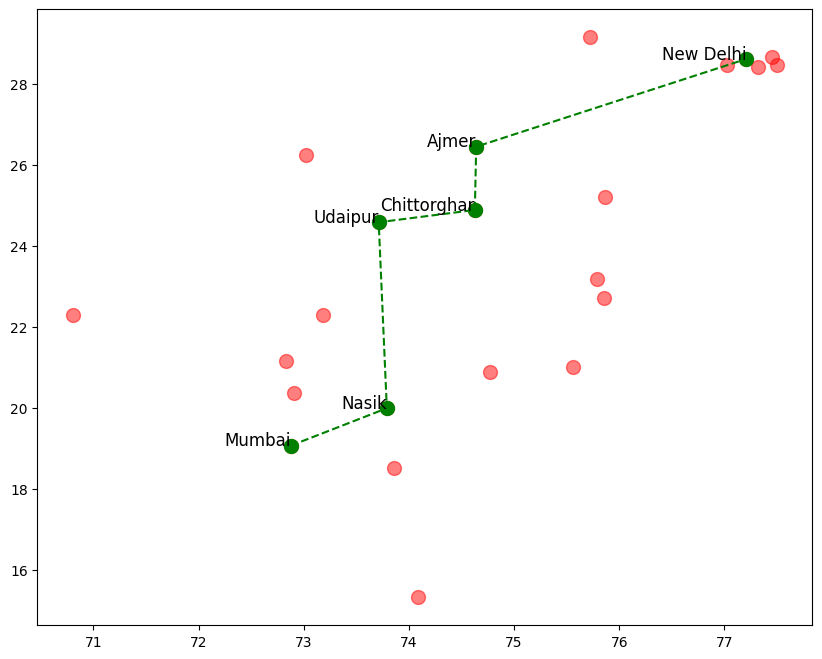

In [13]:
if __name__ == "__main__":
    main()

Available cities:
Mumbai
Pune
Nasik
Dhule
Jalgaon
Goa
Vapi
Surat
Vadodra
Rajkot
Indore
Ajmer
Kota
Jodhpur
Ujjain
Udaipur
Chittorghar
Hisar
Faridabad
Gurugram
Greater Noida
Gaziabad
New Delhi
Enter the start city: Mumbai
Enter the goal city: Chittorghar
Traversing to Pune:
  G(n) = 1 (distance from start)
  H(n) = 6.418406840696608 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 7.418406840696608
  Path so far: ['Mumbai', 'Pune']

Traversing to Nasik:
  G(n) = 1 (distance from start)
  H(n) = 4.962360206587687 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 5.962360206587687
  Path so far: ['Mumbai', 'Nasik']

Traversing to Goa:
  G(n) = 1 (distance from start)
  H(n) = 9.570850020766182 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 10.570850020766182
  Path so far: ['Mumbai', 'Goa']

Traversing to Vapi:
  G(n) = 1 (distance from start)
  H(n) = 4.834456756451545 (heuristic cost to goal)
  F(n) = G(n) + H(n) = 5.834456756451545
  Path so far: ['Mumbai', 'Vapi']

Traversing to Surat:
 

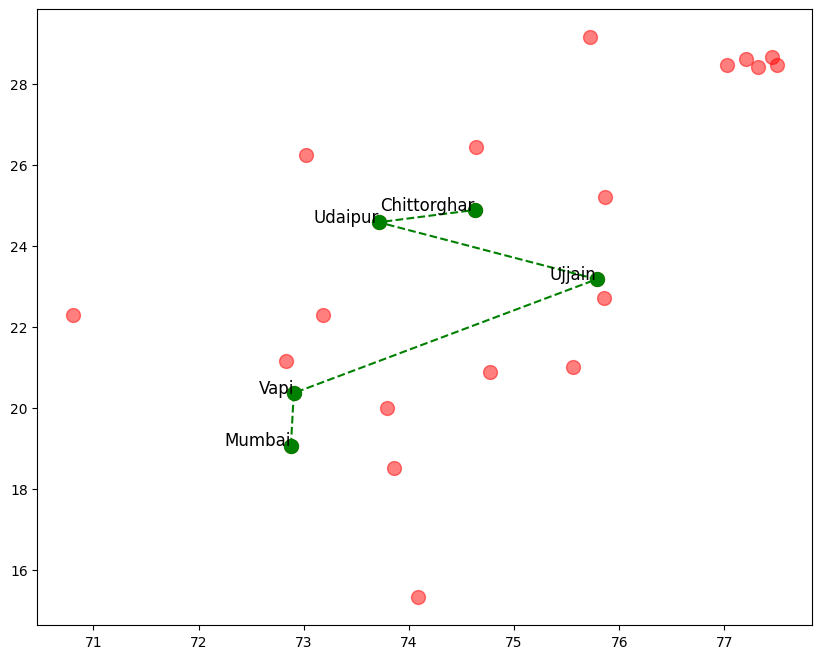

In [14]:
if __name__ == "__main__":
    main()

In [15]:
cities_coordinates = {
    "Juhu Beach": (19.088359, 72.826523),
    "Versova": (19.13415, 72.80969),
    "Andheri West": (19.11919, 72.84626),
    "Vile Parle": (19.1008, 72.8517),
    "Santacruz": (19.0816, 72.8412),
    "Khar West": (19.0661, 72.8423),
    "Bandra": (19.0554, 72.8402),
    "Mahim": (19.0432, 72.8414),
    "Dadar": (19.0176, 72.8424),
    "Matunga": (19.0251, 72.8598),
    "Prabhadevi": (19.0167, 72.8296),
    "Worli": (19.0175, 72.8175),
    "Lower Parel": (18.9933, 72.8284),
    "Haji Ali": (18.9822, 72.8084),
    "Tardeo": (18.9767, 72.8082),
    "Byculla": (18.9764, 72.8318),
    "Marine Drive": (18.9432, 72.8234),
    "Colaba": (18.9067, 72.8147),
    "Gateway of India": (18.9219, 72.8347),
}

In [16]:
off_route_locations = {
    "Chembur": (19.0486, 72.8991),
    "Kurla": (19.0652, 72.8791),
    "Mulund": (19.1726, 72.9568),
    "Powai": (19.1177, 72.9043),
    "Thane": (19.2183, 72.9781),
    "Sion": (19.0453, 72.8618),
    "Lower Parel": (18.9933, 72.8284),
    "Byculla": (18.9764, 72.8318)
}

In [17]:
def haversine_distance(coord1, coord2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [18]:
def a_star_algorithm(start_city, goal_city):
    open_list = []
    heapq.heappush(open_list, (0, start_city))

    closed_list = set()
    g_costs = {start_city: 0}  # G(n) costs
    parents = {start_city: start_city}

    while open_list:
        current_f, current_city = heapq.heappop(open_list)

        if current_city == goal_city:
            final_path = []
            while parents[current_city] != current_city:
                final_path.append(current_city)
                current_city = parents[current_city]
            final_path.append(start_city)
            final_path.reverse()
            print("Final Path:", final_path)
            return final_path

        closed_list.add(current_city)

        for neighbor in city_graph[current_city]:
            if neighbor in closed_list:
                continue

            tentative_g = g_costs[current_city] + haversine_distance(cities_coordinates[current_city], cities_coordinates[neighbor])
            h_cost = haversine_distance(cities_coordinates[neighbor], cities_coordinates[goal_city])
            f_cost = tentative_g + h_cost

            if neighbor not in g_costs or tentative_g < g_costs[neighbor]:
                g_costs[neighbor] = tentative_g
                parents[neighbor] = current_city
                heapq.heappush(open_list, (f_cost, neighbor))

    print("No path found")
    return None

In [20]:
city_graph = {
    "Juhu Beach": ["Versova", "Andheri West", "Vile Parle"],
    "Versova": ["Juhu Beach", "Andheri West"],
    "Andheri West": ["Versova", "Juhu Beach", "Vile Parle", "Bandra"],
    "Vile Parle": ["Juhu Beach", "Andheri West", "Santacruz"],
    "Santacruz": ["Vile Parle", "Khar West"],
    "Khar West": ["Santacruz", "Bandra"],
    "Bandra": ["Andheri West", "Khar West", "Mahim"],
    "Mahim": ["Bandra", "Dadar"],
    "Dadar": ["Mahim", "Matunga", "Prabhadevi"],
    "Matunga": ["Dadar", "Prabhadevi"],
    "Prabhadevi": ["Matunga", "Worli"],
    "Worli": ["Prabhadevi", "Haji Ali", "Tardeo"],
    "Haji Ali": ["Worli", "Marine Drive"],
    "Tardeo": ["Worli", "Haji Ali", "Byculla"],
    "Byculla": ["Tardeo", "Marine Drive"],
    "Marine Drive": ["Byculla", "Colaba"],
    "Colaba": ["Marine Drive", "Gateway of India"],
    "Gateway of India": ["Colaba"],
}


In [21]:
def plot_path_on_map(path):
    plt.figure(figsize=(10, 8))

    lats_path = [cities_coordinates[city][0] for city in path]
    lons_path = [cities_coordinates[city][1] for city in path]

    plt.plot(lons_path, lats_path, marker="o", linestyle="--", color="red", markersize=10, label="Path")

    for i, city in enumerate(path):
        plt.text(lons_path[i], lats_path[i], city, fontsize=12, ha='right')

    for city, (lat, lon) in cities_coordinates.items():
        plt.scatter(lon, lat, color='red', s=100, label=city if city not in path else "", alpha=0.5)


Available cities:
Juhu Beach
Versova
Andheri West
Vile Parle
Santacruz
Khar West
Bandra
Mahim
Dadar
Matunga
Prabhadevi
Worli
Lower Parel
Haji Ali
Tardeo
Byculla
Marine Drive
Colaba
Gateway of India
Enter the start city: Juhu Beach
Enter the goal city: Dadar
Final Path: ['Juhu Beach', 'Vile Parle', 'Santacruz', 'Khar West', 'Bandra', 'Mahim', 'Dadar']
Final Path: ['Juhu Beach', 'Vile Parle', 'Santacruz', 'Khar West', 'Bandra', 'Mahim', 'Dadar']


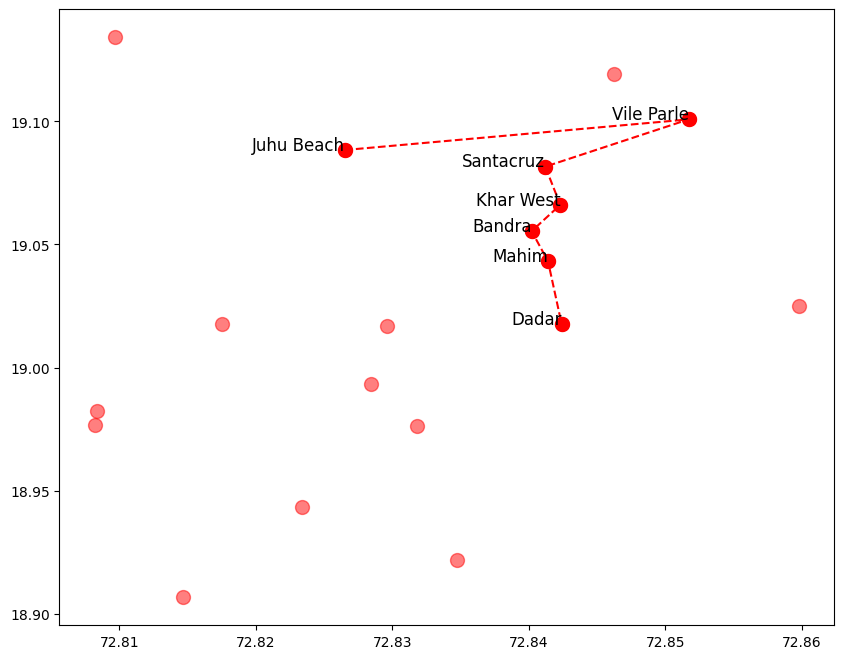

In [23]:
def main():
    print("Available cities:")
    for city in cities_coordinates.keys():
        print(city)
    start_city = input("Enter the start city: ")
    goal_city = input("Enter the goal city: ")

    if start_city not in cities_coordinates or goal_city not in cities_coordinates:
        print("Invalid city entered.")
        return
    final_path = a_star_algorithm(start_city, goal_city)

    if final_path:
        print(f"Final Path: {final_path}")
        plot_path_on_map(final_path)

if __name__ == "__main__":
    main()

Available cities:
Juhu Beach
Versova
Andheri West
Vile Parle
Santacruz
Khar West
Bandra
Mahim
Dadar
Matunga
Prabhadevi
Worli
Lower Parel
Haji Ali
Tardeo
Byculla
Marine Drive
Colaba
Gateway of India
Enter the start city: Juhu Beach
Enter the goal city: Gateway of India
Final Path: ['Juhu Beach', 'Vile Parle', 'Santacruz', 'Khar West', 'Bandra', 'Mahim', 'Dadar', 'Prabhadevi', 'Worli', 'Haji Ali', 'Marine Drive', 'Colaba', 'Gateway of India']
Final Path: ['Juhu Beach', 'Vile Parle', 'Santacruz', 'Khar West', 'Bandra', 'Mahim', 'Dadar', 'Prabhadevi', 'Worli', 'Haji Ali', 'Marine Drive', 'Colaba', 'Gateway of India']


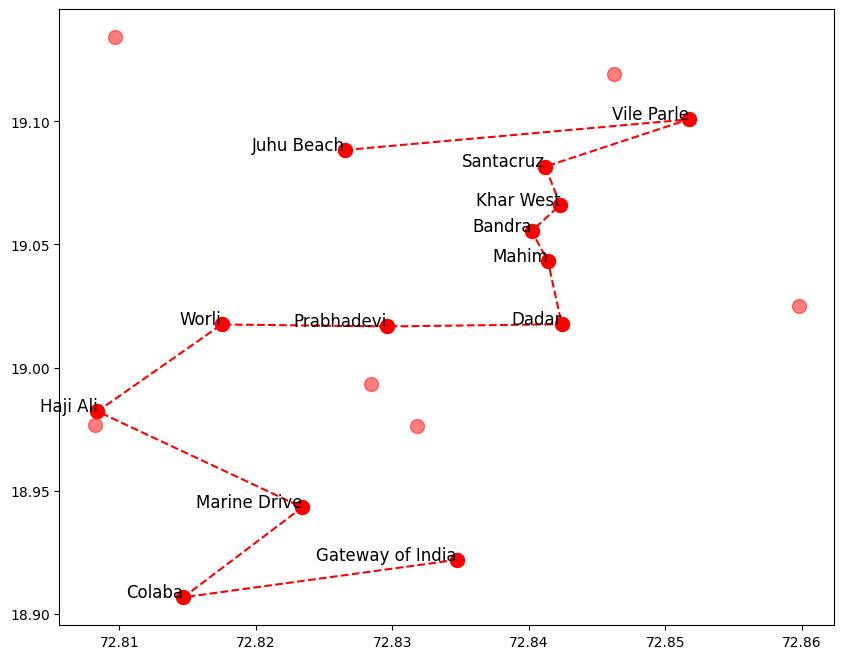

In [24]:
if __name__ == "__main__":
    main()

## Conclusion

The A* algorithm is a powerful pathfinding and graph traversal technique that combines the benefits of Dijkstra's algorithm and heuristics for efficient searching. Its optimality and completeness make it suitable for various applications, including robotics, video games, geographical mapping, and network routing. By intelligently estimating costs, A* efficiently finds the shortest path, making it a valuable tool in fields requiring navigation and optimization.
